In [7]:
import numpy as np
import graphviz as gv
import math

In [8]:
def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             simplepath=True,
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  path = enumerate(path) if simplepath else path
  for v, u in path:
    if u != -1:
      if weighted:
        for vi, w in L[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [9]:
def floydWarshall(G):
    n = len(G)
    cost = np.full((n, n), math.inf)
    path = np.full((n, n), -1, dtype=int)

    for u in range(n):
        for v, w in G[u]:
            cost[u, v] = w
            path[u, v] = u

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if i != j and j != k and k != i:
                    f = cost[i, k] + cost[k, j]
                    if f < cost[i, j]:
                        cost[i, j] = f
                        path[i, j] = path[k, j]

    return cost, path

In [10]:
%%file a1.al
3 3 4 9
0 9 2 2 6 4
1 4 5 6
-
6 8
1 1 3 9
5 3 7 1
6 3

Overwriting a1.al


In [11]:
with open("a1.al") as f:
  G = []
  for line in f:
    if line == '-\n':
      G.append([])
    else:
      nums = [int(x) for x in line.split()]
      G.append([(nums[i], nums[i+1]) for i in range(0, len(nums), 2)])

  for x in G:
    print(x)

[(3, 3), (4, 9)]
[(0, 9), (2, 2), (6, 4)]
[(1, 4), (5, 6)]
[]
[(6, 8)]
[(1, 1), (3, 9)]
[(5, 3), (7, 1)]
[(6, 3)]


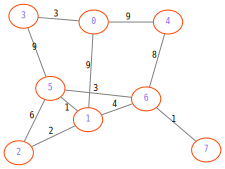

In [12]:
adjlShow(G, weighted=True, layout="neato")

In [13]:
cost, path = floydWarshall(G)
print(cost)
print(path)

[[inf 21. 23.  3.  9. 20. 17. 18.]
 [ 9. inf  2. 12. 18.  7.  4.  5.]
 [13.  4. inf 15. 22.  6.  8.  9.]
 [inf inf inf inf inf inf inf inf]
 [21. 12. 14. 20. inf 11.  8.  9.]
 [10.  1.  3.  9. 19. inf  5.  6.]
 [13.  4.  6. 12. 22.  3. inf  1.]
 [16.  7.  9. 15. 25.  6.  3. inf]]
[[-1  5  1  0  0  6  4  6]
 [ 1 -1  1  0  0  6  1  6]
 [ 1  2 -1  5  0  2  1  6]
 [-1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  5  1  5 -1  6  4  6]
 [ 1  5  1  5  0 -1  1  6]
 [ 1  5  1  5  0  6 -1  6]
 [ 1  5  1  5  0  6  7 -1]]


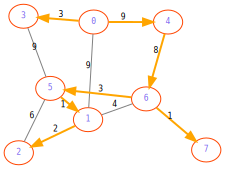

In [14]:
adjlShow(G, weighted=True, path=path[0], layout="neato")